Este colab fue desarrollado por Arnold Charry Armero

# Wall Street Firm

Muchos modelos de programación lineal son utilizados por Wall Street para seleccionar una cartera de bonos deseable.
A continuación se muestra una versión simplificada de dicho modelo. Solodrex
está considerando invertir en cuatro bonos; $\$1.000.000$ es
disponible para inversión. El rendimiento anual esperado, el
rendimiento anual en el peor de los casos de cada bono, y la “duración”
de cada bono se dan en la Tabla 15. La duración de un bono
es una medida de la sensibilidad del bono a las tasas de interés.
Solodrex quiere maximizar el rendimiento esperado de su
inversiones en bonos, sujetas a tres restricciones.



*   Restricción 1: El peor rendimiento de la cartera de bonos
debe ser al menos del 8%.
*   Restricción 2: La duración promedio de la cartera debe ser
como máximo 6. Por ejemplo, una cartera que invirtió $\$600,000$
en el bono 1 y $\$400,000$ en el bono 4 tendrían un promedio
duración de 5.4
*   Restricción 3: Debido a los requisitos de diversificación, al menos
más del 40% del monto total invertido se puede invertir en una
enlace sencillo.

Formule un LP que permita a Solodrex maximizar el
retorno esperado de su inversión.







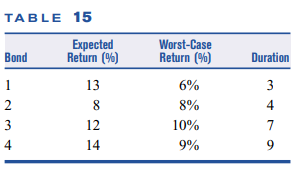

#Conjuntos

$ i = \text{Inversión indexado por } i$



# Parámetros

$P_{i} = \textrm{Porcentaje de ganancia de realizar la inversión } i $

$PP_{i} = \textrm{Porcentaje de ganancia de realizar la inversión } i \textrm{ en el peor escenario }$

$ D_{i} = \textrm{Duración de realizar la inversión } i $

$ B = \textrm{Presupuesto para invertir }  $


## Variables de decisión

$ x_{i} = \textrm{Cantidad invertida en la inversión }i $

## Función Objetivo

$$ \textrm{Max } z = \sum_{i = 1}^{n} P_{i}\: x_{i} $$

# Restricciones

No se puede rebasar el presupuesto,

$$ \sum_{i = 1}^{n} x_{i} \leq  B $$

El peor rendimiento de la cartera de bonos
debe ser al menos del 8%,

$$ \sum_{i = 1}^{n} PP_{i} \: x_{i} \geq  0.08 \sum_{i = 1}^{n} \: x_{i} $$

La duración promedio de la cartera debe ser
como máximo 6,

$$ \sum_{i = 1}^{n} D_{i} \:x_{i} \leq  6 \sum_{i = 1}^{n} \:x_{i} $$

Se debe invertir como máximo 40% en cada línea de inversión,

$$ x_{i} \leq 0.4 \sum_{h = 1}^{n} x_{h}, \forall i$$

In [ ]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 42.1 MB/s eta 0:00:00


In [ ]:
#Se importa la libreria
from pulp import *

In [ ]:
#Conjuntos
inversiones = range(4)

In [10]:
#Parámetros

P = [0.13, 0.08, 0.12, 0.14]

PP = [0.06, 0.08, 0.1, 0.09]

D = [3, 4, 7, 9]

B = 1000000

In [11]:
# Crear la instancia del modelo
model = LpProblem(name="Wall_Street_Firm", sense=LpMaximize)

# Inicialización de las variables de decisión
X = LpVariable.dicts("X", (inversiones), 0, None, LpContinuous)

# Agregar la función objetivo
model += lpSum([P[i] * X[i] for i in inversiones])

# Agregar las restricciones

model += lpSum([X[i] for i in inversiones]) <= B

model += lpSum(PP[i] * X[i] for i in inversiones) >= 0.08 * lpSum(X[i] for i in inversiones)

model += lpSum(D[i] * X[i] for i in inversiones) <= 6 * lpSum(X[i] for i in inversiones)

for i in inversiones:
  model += X[i] <= 0.4 * lpSum([X[h] for h in inversiones])

# Resolver el problema
model.solve()

# Imprimir el estado del problema
print("Status:", LpStatus[model.status])

# Imprimir las variables
for v in model.variables():
    print(v.name, "=", v.varValue)

# Imprimir la función objetivo
print("Utilidades totales = $", value(model.objective))

Status: Optimal
X_0 = 400000.0
X_1 = 0.0
X_2 = 300000.0
X_3 = 300000.0
Utilidades totales = $ 130000.0
